## TELCO CUSTOMER CHURN

### OBJECTIVE

The primary objective of a Telco customer churn project is to **predict which customers are likely to discontinue their service with the telecom company (churn)**. By identifying these customers early, the company can take proactive measures to retain them, such as offering personalized discounts, improved customer service, or other incentives.

Here's a more detailed breakdown of the objectives:

1. **Predict Churn:** Build a predictive model that accurately classifies customers as likely to churn or not churn based on their demographics, usage patterns, and other relevant features.

2. **Identify Key Factors:** Analyze the data to uncover the most significant factors that contribute to customer churn. This could include factors like contract type, monthly charges, service quality, customer demographics, and more.

3. **Develop Retention Strategies:**  Use the insights gained from the predictive model and data analysis to design targeted retention strategies. These strategies could involve:
    * Offering special promotions or discounts to high-risk customers.
    * Improving customer service interactions.
    * Developing new products or services that better meet customer needs.
    * Proactively addressing customer concerns and complaints.

4. **Reduce Churn Rate:** Ultimately, the goal is to decrease the overall customer churn rate, leading to improved customer retention and increased revenue for the telecom company.

5. **Improve Customer Lifetime Value (CLTV):** By retaining customers for longer periods, the company can increase the average CLTV, which is the total value a customer brings to the company over the entire duration of their relationship.

6. **Optimize Marketing and Sales Efforts:** The insights gained from the project can be used to optimize marketing and sales campaigns by targeting customers who are less likely to churn or focusing on customer segments with higher churn risk.

7. **Gain Competitive Advantage:** By understanding and addressing customer churn, the telecom company can differentiate itself from competitors and build stronger customer relationships.

Overall, the success of a Telco customer churn project is measured by its ability to deliver actionable insights that help the company reduce churn, improve customer satisfaction, and drive business growth.


### **Data Set**

- **customerID**: Customer ID
- **gender**: Gender of the customer (Male, Female)
- **SeniorCitizen**: Senior citizen status (1 = Yes, 0 = No)
- **Partner**: Partner status (Yes, No)
- **Dependents**: Dependent status (Yes, No)
- **tenure**: Number of months the customer has been with the company
- **PhoneService**: Phone service status (Yes, No)
- **MultipleLines**: Multiple lines status (Yes, No, No phone service)
- **InternetService**: Internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Online security status (Yes, No, No internet service)
- **OnlineBackup**: Online backup status (Yes, No, No internet service)
- **DeviceProtection**: Device protection status (Yes, No, No internet service)
- **TechSupport**: Tech support status (Yes, No, No internet service)
- **StreamingTV**: Streaming TV status (Yes, No, No internet service)
- **StreamingMovies**: Streaming movies status (Yes, No, No internet service)
- **Contract**: Contract term (Month-to-month, One year, Two year)
- **PaperlessBilling**: Paperless billing status (Yes, No)
- **PaymentMethod**: Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: Monthly charges for the customer
- **TotalCharges**: Total charges for the customer
- **Churn**: Churn status (Yes, No)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

In [2]:
# Access csv by using kaggle API
api = KaggleApi()
api.authenticate()

api.dataset_download_files('blastchar/telco-customer-churn', path='./', unzip=True)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking Feature data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Checking for null-values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Checking for number of rows and columns
df.shape

(7043, 21)

In [6]:
# More robust information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Count missing values in each column
missing_values_count = df.isna().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Check if any missing values exist in the entire DataFrame
any_missing = df.isna().any().any()  # Double any() to check across all rows and columns
print(f"Are there any missing values in the DataFrame? {any_missing}")

Are there any missing values in the DataFrame? False


In [9]:
# Convert 'TotalCharges' column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')                                

In [10]:
# Check if any missing values exist in the entire DataFrame
any_missing = df.isna().any().any()  # Double any() to check across all rows and columns
print(f"Are there any missing values in the DataFrame? {any_missing}")

Are there any missing values in the DataFrame? True


In [11]:
# Count the number of NaN values in 'TotalCharges'
num_nan = df['TotalCharges'].isna().sum()
print(f"Number of NaN values in 'TotalCharges': {num_nan}")

Number of NaN values in 'TotalCharges': 11


In [12]:
# Assuming the dataset is stored in a DataFrame named 'df'
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for feature in categorical_features:
    print(f"Feature: {feature}")
    print(df[feature].unique())
    print()

Feature: gender
['Female' 'Male']

Feature: SeniorCitizen
[0 1]

Feature: Partner
['Yes' 'No']

Feature: Dependents
['No' 'Yes']

Feature: PhoneService
['No' 'Yes']

Feature: MultipleLines
['No phone service' 'No' 'Yes']

Feature: InternetService
['DSL' 'Fiber optic' 'No']

Feature: OnlineSecurity
['No' 'Yes' 'No internet service']

Feature: OnlineBackup
['Yes' 'No' 'No internet service']

Feature: DeviceProtection
['No' 'Yes' 'No internet service']

Feature: TechSupport
['No' 'Yes' 'No internet service']

Feature: StreamingTV
['No' 'Yes' 'No internet service']

Feature: StreamingMovies
['No' 'Yes' 'No internet service']

Feature: Contract
['Month-to-month' 'One year' 'Two year']

Feature: PaperlessBilling
['Yes' 'No']

Feature: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Feature: Churn
['No' 'Yes']



In [13]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

In [14]:
##### using Ensemble to address fill value

In [15]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_features)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df_encoded.columns)

# Inverse transform the scaled data back to the original scale
df_imputed_original_scale = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_encoded.columns)

# Replace the imputed TotalCharges back into the original dataframe
df['TotalCharges'] = df_imputed_original_scale['TotalCharges']

# Check if there are any missing values left
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Univariate Analysis
Categorical Variables

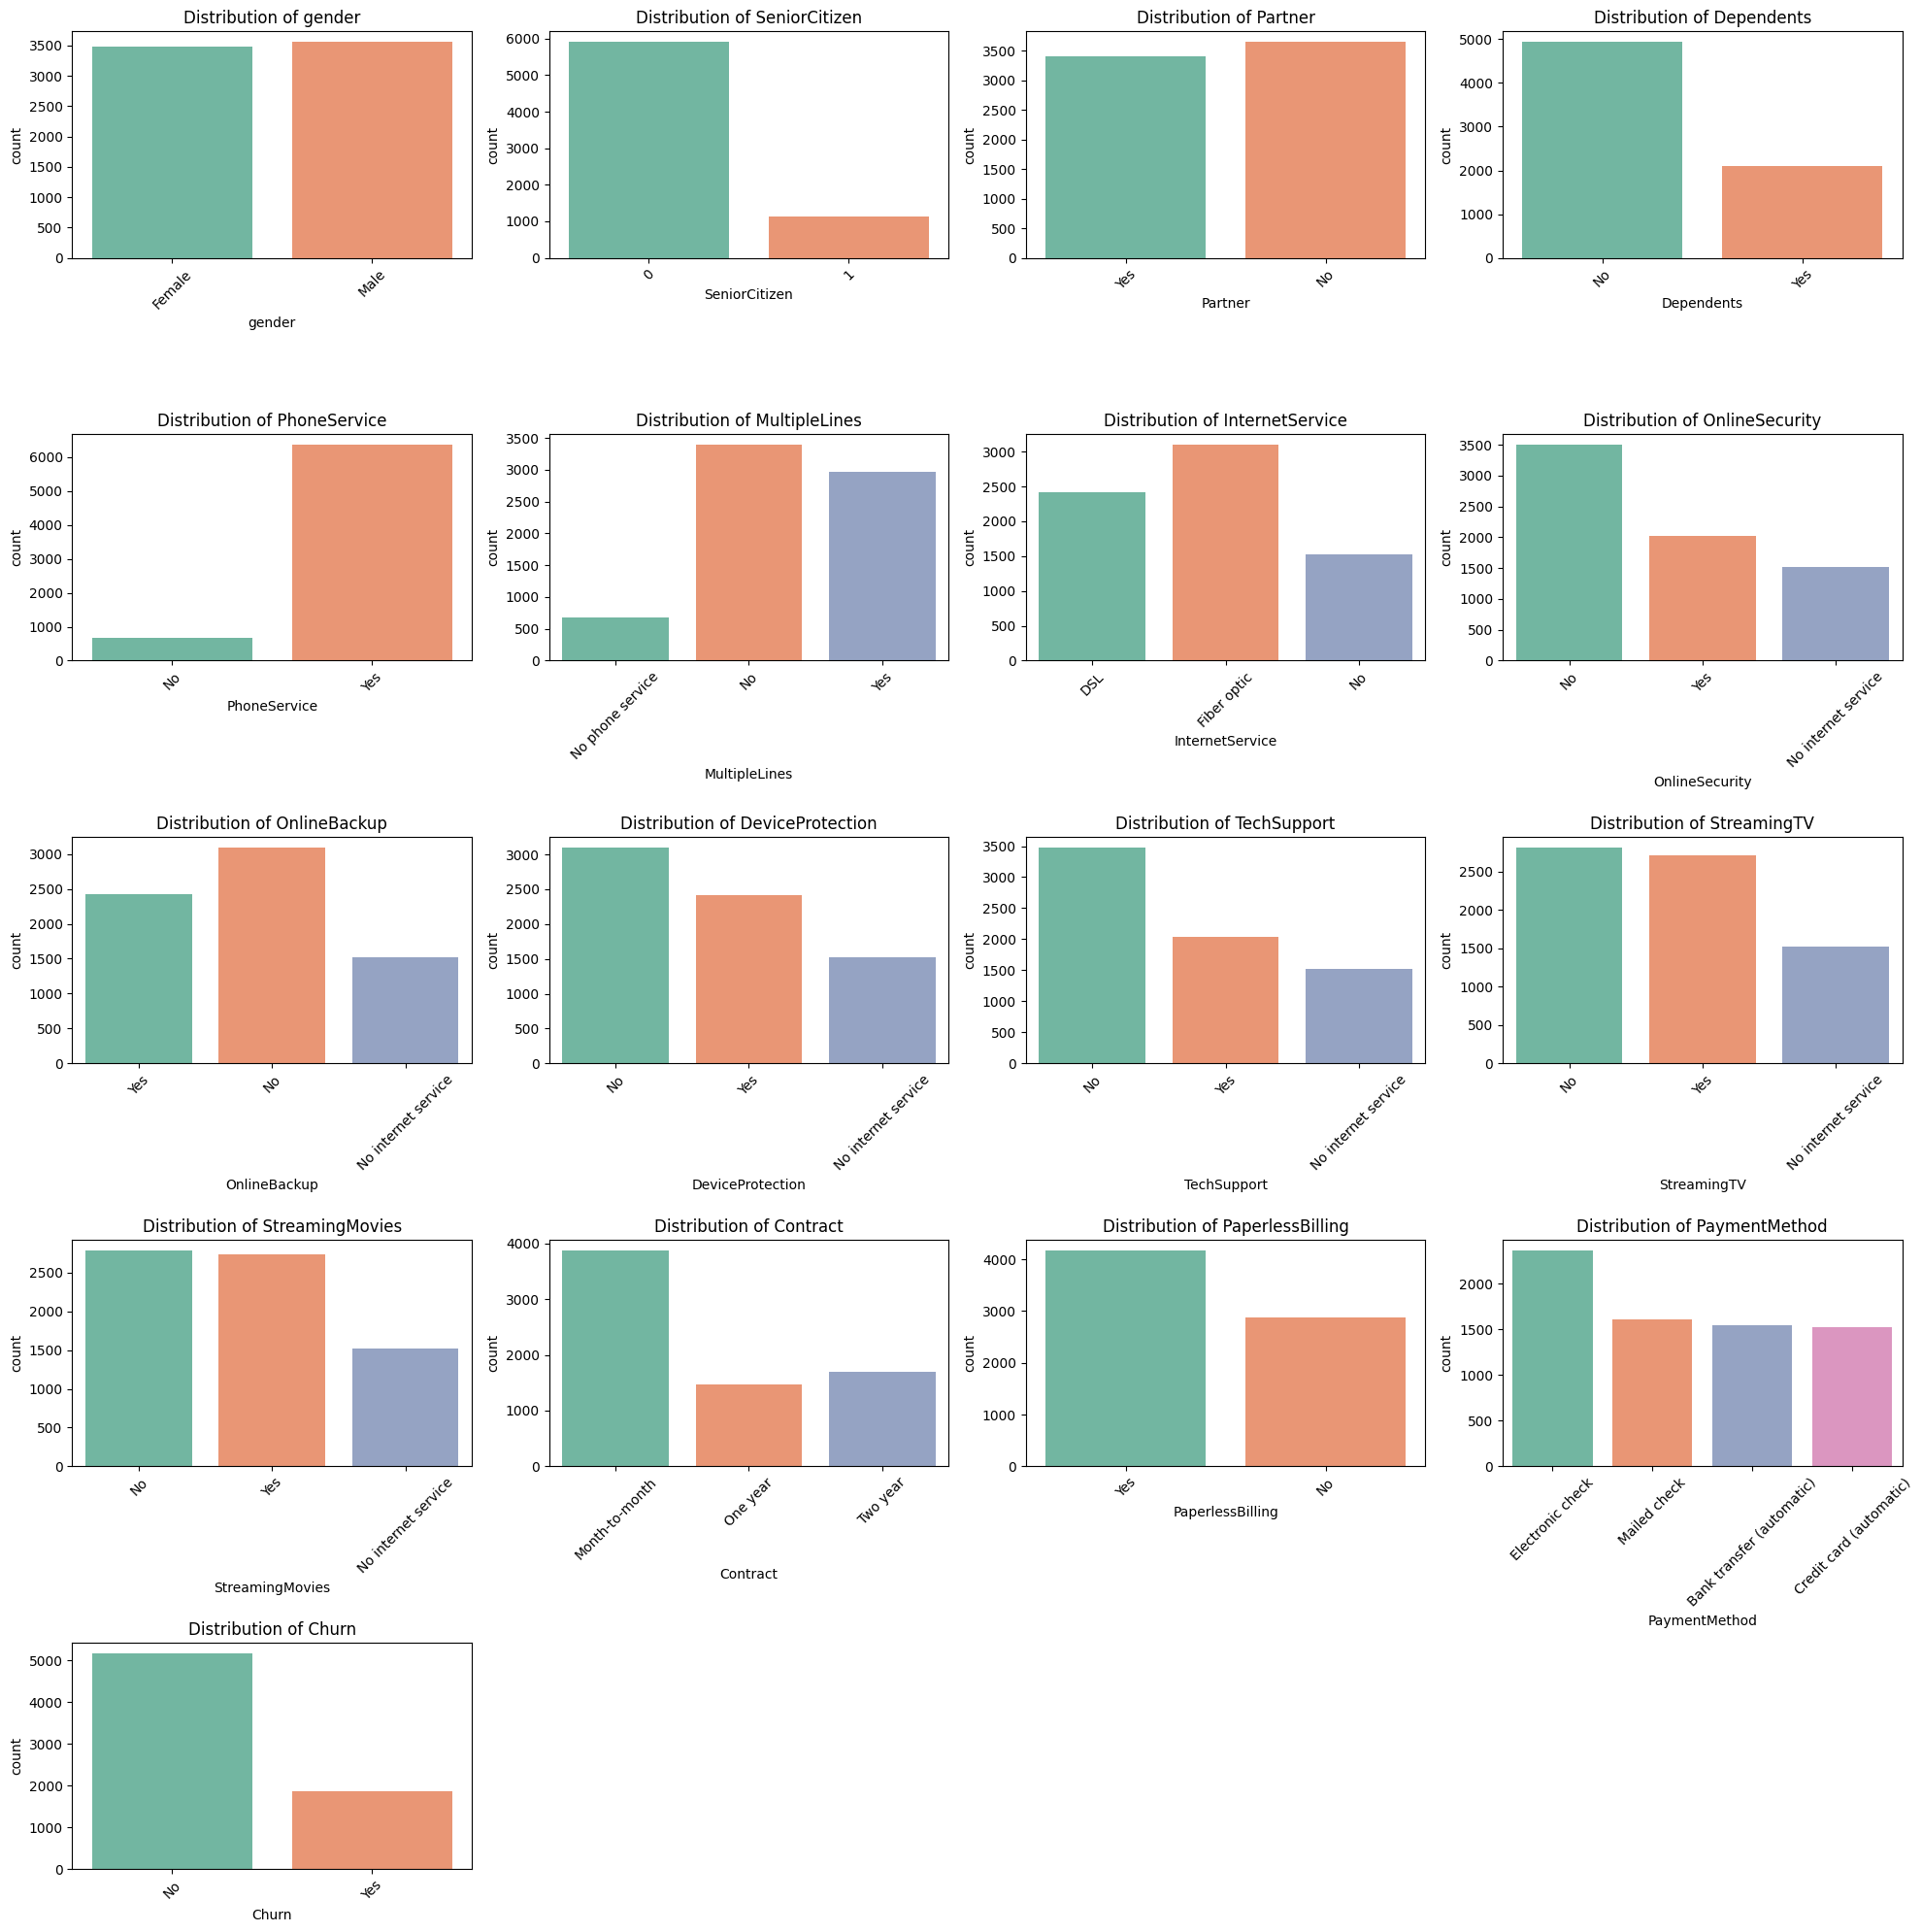

In [17]:
# Plot categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 4, i + 1)
    sns.countplot(data=df, x=feature, palette="Set2", hue=feature)
    plt.legend([], [], frameon=False)  # Remove legend to avoid duplication
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Numerical Variables

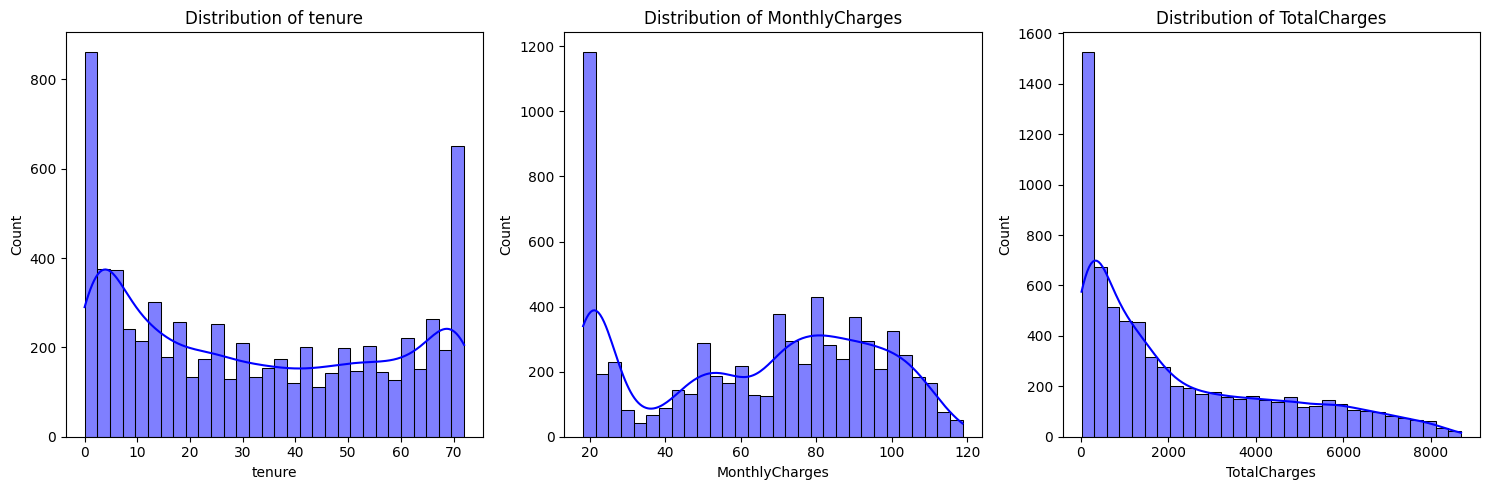

In [18]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Bivariate Analysis
Categorical vs Target Variable

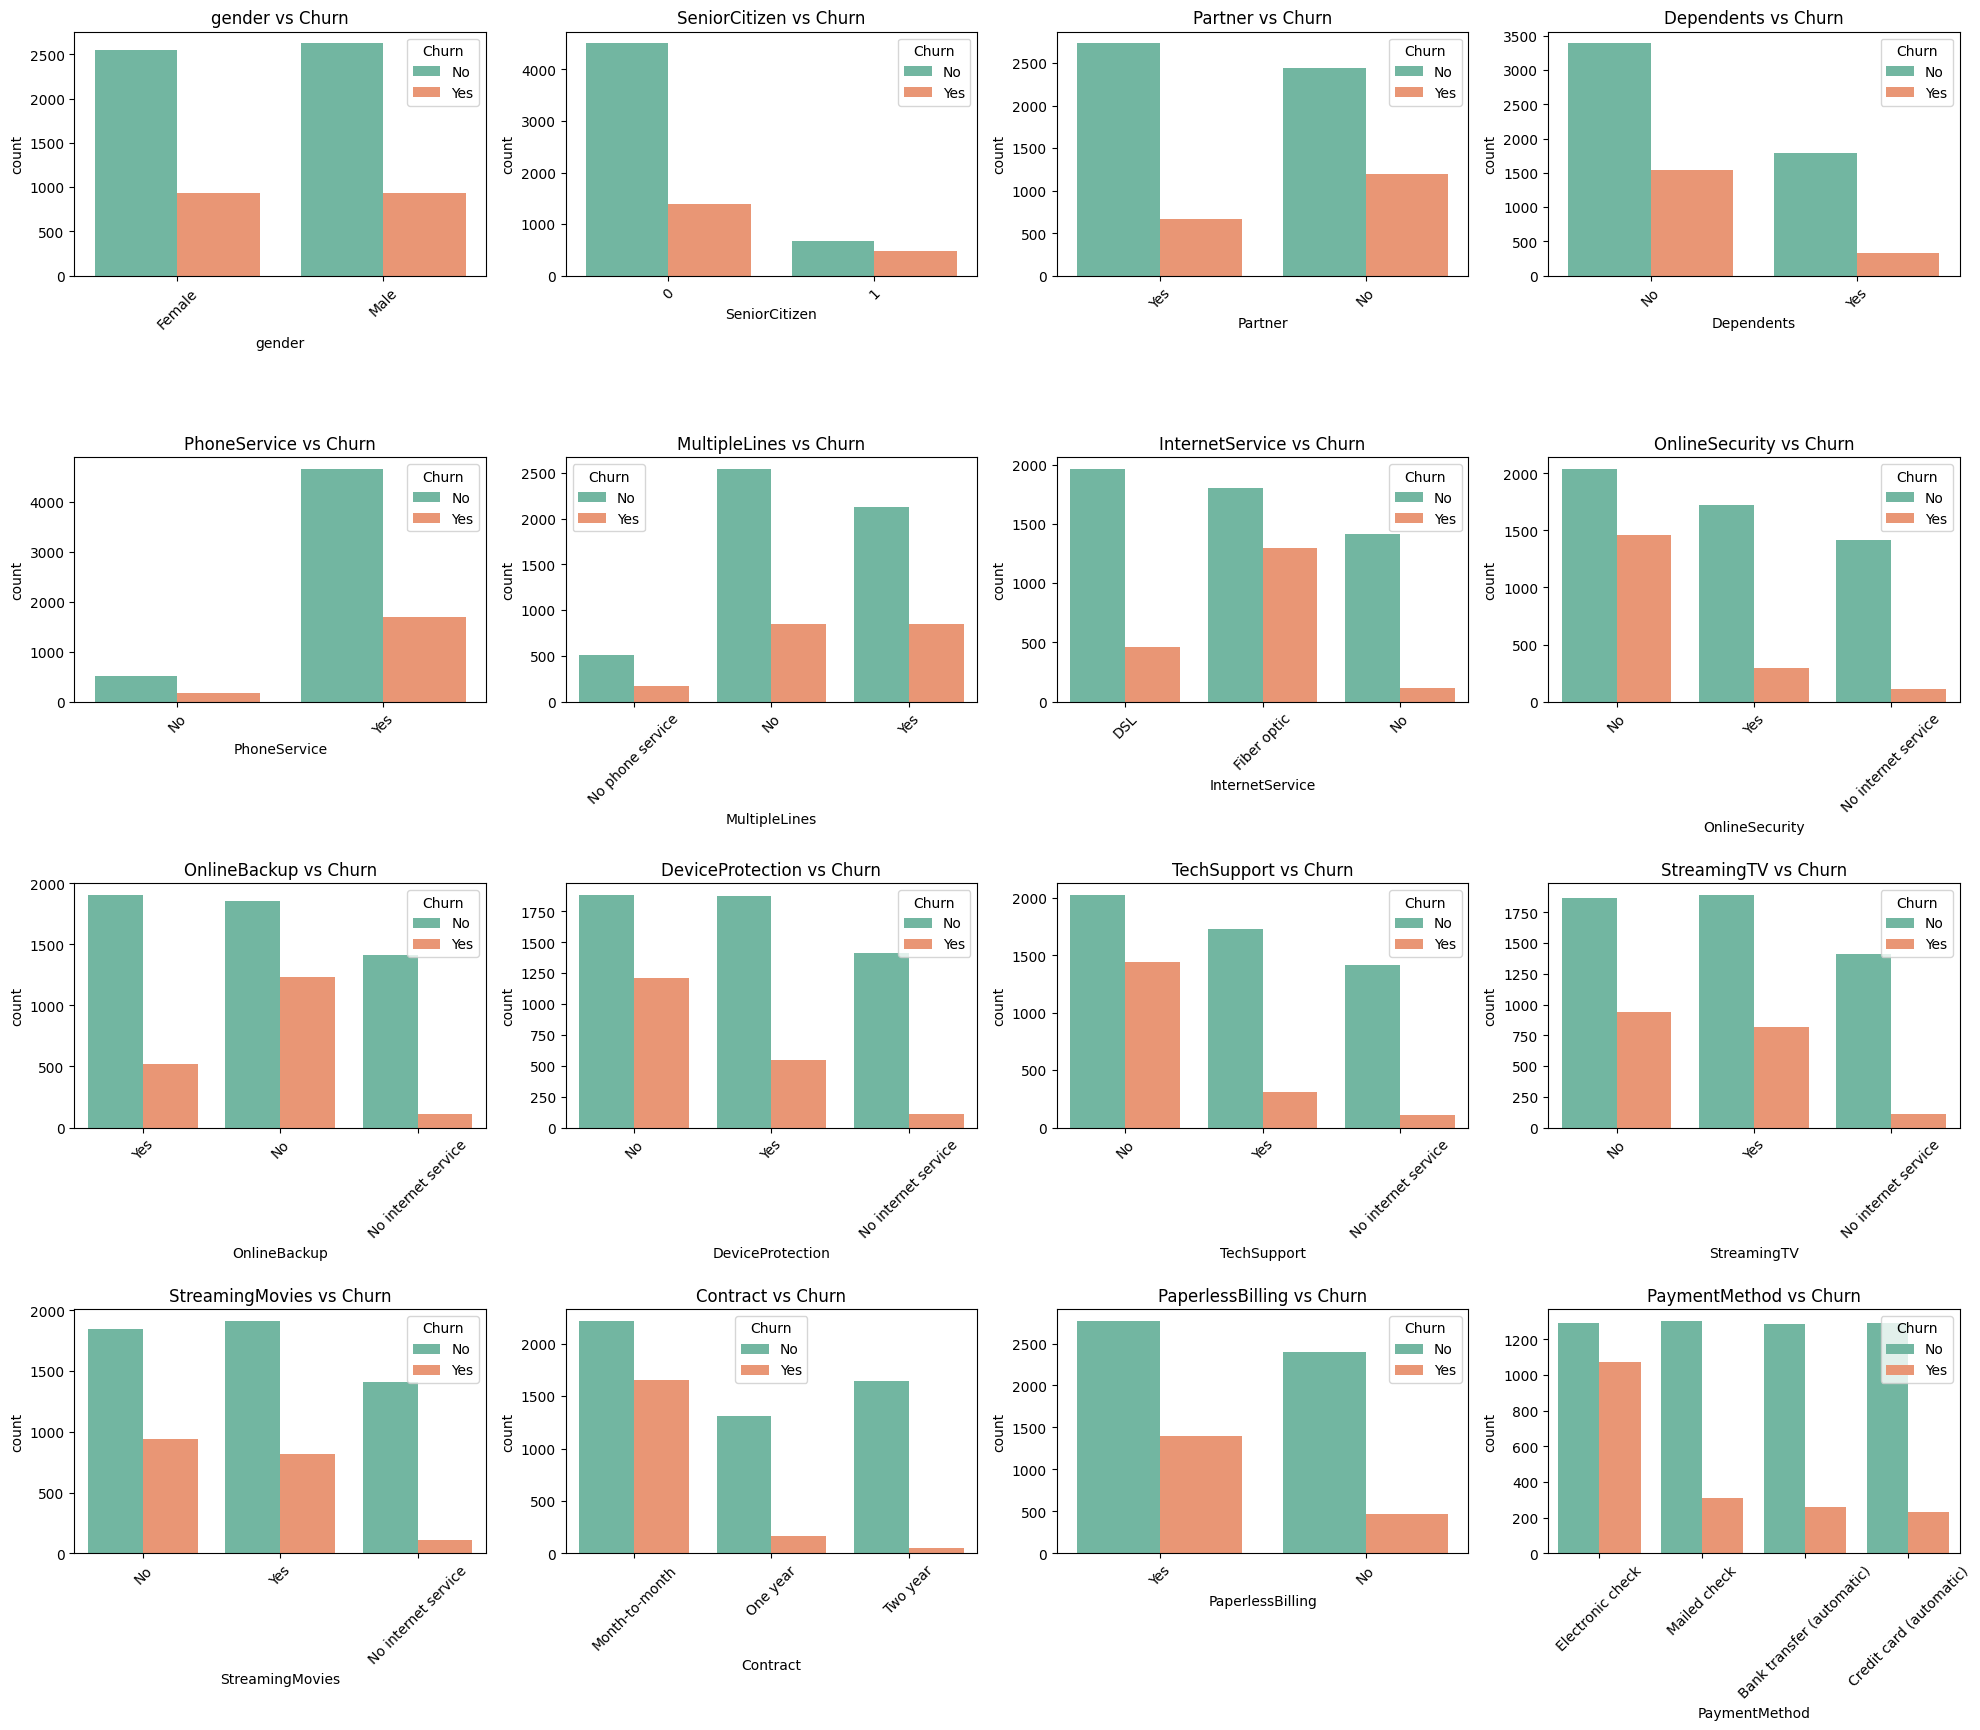

In [19]:
# Plot relationship between categorical features and target variable
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features[:-1]):  # Exclude 'Churn' itself
    plt.subplot(5, 4, i + 1)
    sns.countplot(data=df, x=feature, hue='Churn', palette="Set2")
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

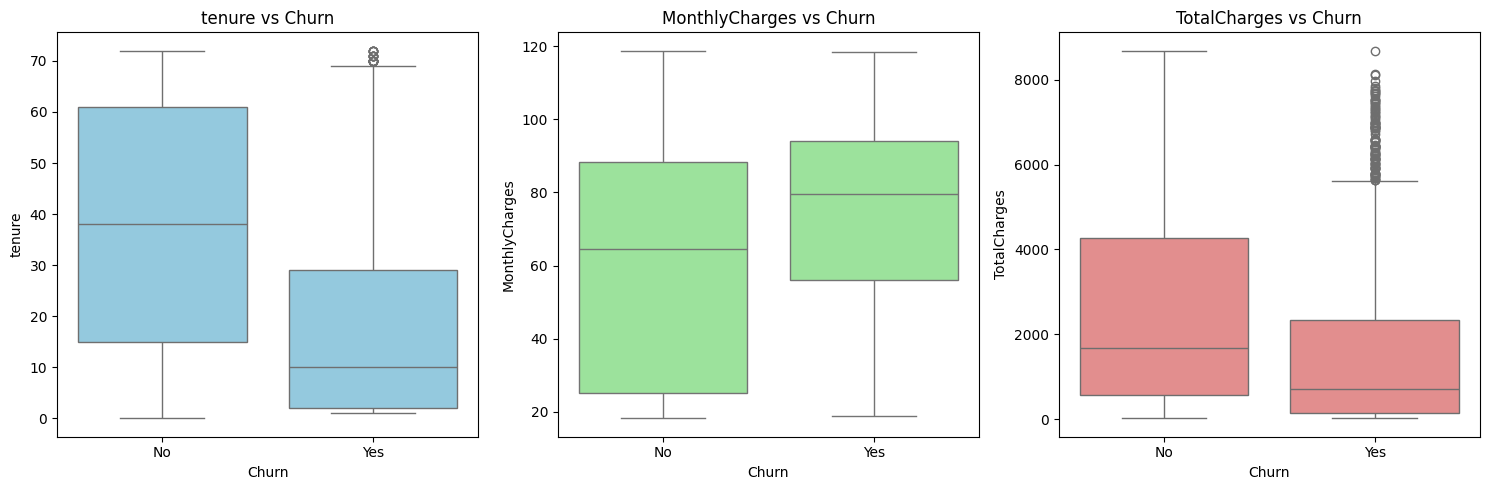

In [20]:
# Plot relationship between numerical features and target variable

# Define colors for each plot
colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='Churn', y=feature, color=colors[i])
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

In [21]:
# Function to remove outliers using IQR method for a specific feature and Churn value
def remove_outliers_iqr(df, feature, churn_value):
    Q1 = df[df['Churn'] == churn_value][feature].quantile(0.25)
    Q3 = df[df['Churn'] == churn_value][feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound) | (df['Churn'] != churn_value)]
    return filtered_df
    
# Remove outliers for each numerical feature based on Churn
for feature in numerical_features:
    df = remove_outliers_iqr(df, feature, 'Yes')
    df = remove_outliers_iqr(df, feature, 'No')

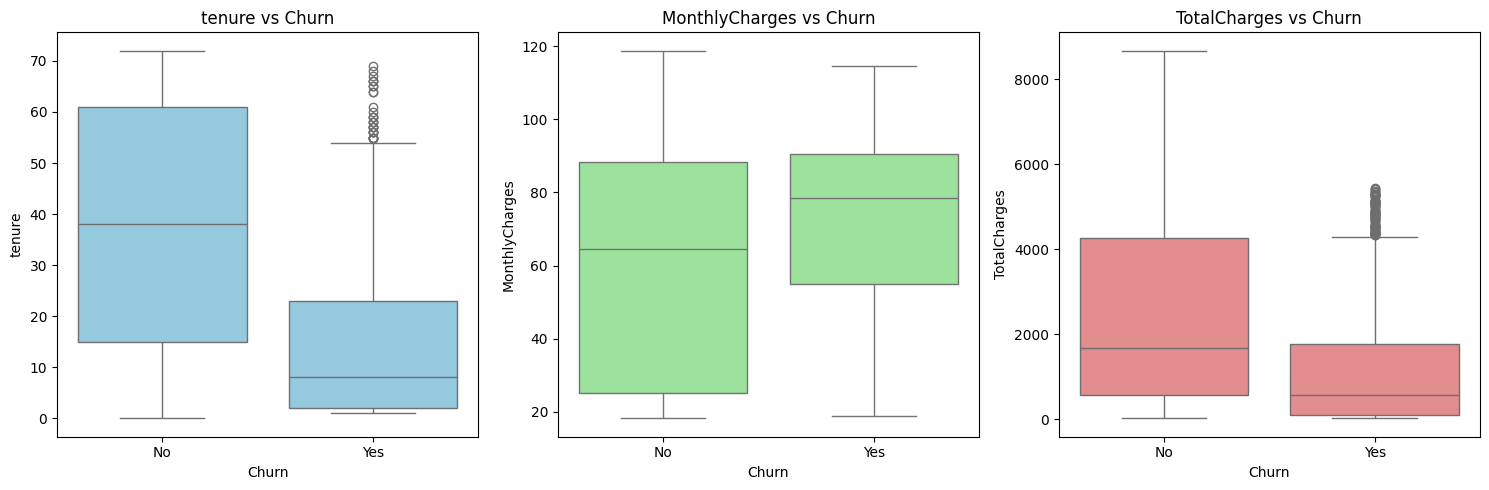

In [22]:
# Plot relationship between numerical features and target variable after removing outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='Churn', y=feature, color=colors[i])
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Multivariate Analysis 
Correlation Matrix with Color

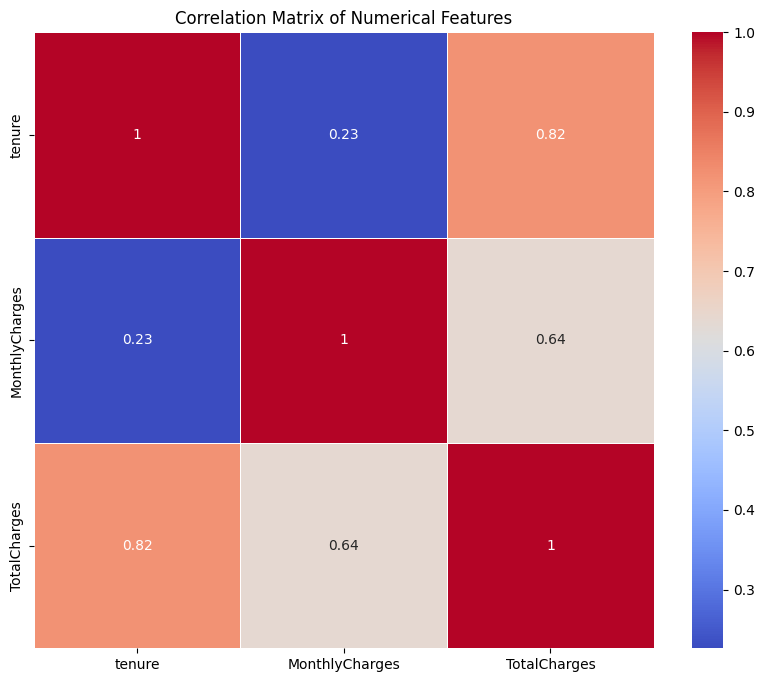

In [23]:
# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6913 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6913 non-null   object 
 1   gender            6913 non-null   object 
 2   SeniorCitizen     6913 non-null   int64  
 3   Partner           6913 non-null   object 
 4   Dependents        6913 non-null   object 
 5   tenure            6913 non-null   int64  
 6   PhoneService      6913 non-null   object 
 7   MultipleLines     6913 non-null   object 
 8   InternetService   6913 non-null   object 
 9   OnlineSecurity    6913 non-null   object 
 10  OnlineBackup      6913 non-null   object 
 11  DeviceProtection  6913 non-null   object 
 12  TechSupport       6913 non-null   object 
 13  StreamingTV       6913 non-null   object 
 14  StreamingMovies   6913 non-null   object 
 15  Contract          6913 non-null   object 
 16  PaperlessBilling  6913 non-null   object 
 17  

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.to_csv('Telco_Customer_Churn_clean.csv', index=False, sep=',', header=True)